### Neural Transfer using Pytorch
(Author: Alexis Jecq)

In [11]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
import torchvision.models as models

import copy

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

plt.ion()

- 使用PIL读取的图像范围在0-255之间
- Pytorch框架处理图像范围在0-1之间
- Caffe框架处理图像范围在0-255之间

In [24]:
imsize = 512 if torch.cuda.is_available() else 128
loader = transforms.Compose([
    transforms.Resize(imsize),
    transforms.ToTensor()
])

def image_loader(image_name):
    image = Image.open(image_name)
    image = loader(image).unsqueeze(0)
    return image.to(device,torch.float)

style_img = image_loader("./data/style_transfer/picasso.jpg")
content_img = image_loader("./data/style_transfer/dancing.jpg")

assert style_img.size() == content_img.size(), "We need to import style and content images of the same size"

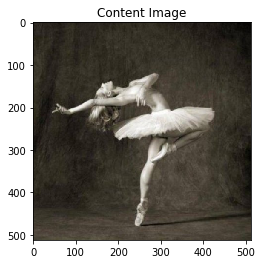

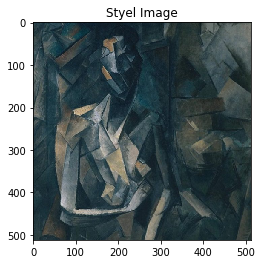

In [29]:
unloader = transforms.ToPILImage()

def imshow(tensor,title=None):
    image = tensor.cpu().clone()
    image = image.squeeze(0)
    image = unloader(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.1)

plt.figure()
imshow(content_img,title='Content Image')

plt.figure()
imshow(style_img, title = 'Styel Image')
